In [1]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

#in order to prin all the columns
pd.set_option('display.max_columns', 100)

In [2]:
#reading the datasets
bonifici = pd.read_csv("datasets/quiubi_bonifici.csv")

# Preprocessing Bonifici

In [3]:
bonifici.describe(include = 'all')

indice                                IP  \
count                       482909                            482909   
unique                      482908                            142406   
top     20150222225717271000318152  54ddf32e6ad82ebce3654f25c1b3f8c0   
freq                             2                              4134   
mean                           NaN                               NaN   
std                            NaN                               NaN   
min                            NaN                               NaN   
25%                            NaN                               NaN   
50%                            NaN                               NaN   
75%                            NaN                               NaN   
max                            NaN                               NaN   

                              IDSessione IDTransazione  CRO  \
count                             482909        482909  0.0   
unique                            327194             1  NaN   
top     b092cbf73ee21622171797f03ae6d6f6         n./d.  NaN   
freq                                 203        482909  NaN   
mean                                 NaN           NaN  NaN   
std                                  NaN           NaN  NaN   
min                                  NaN           NaN  NaN   
25%                                  NaN           NaN  NaN   
50%                                  NaN           NaN  NaN   
75%                                  NaN           NaN  NaN   
max                                  NaN           NaN  NaN   

                  Timestamp          TipoOperazione  Causale        Importo  \
count                482909                  482908      0.0  482909.000000   
unique               455613                      31      NaN            NaN   
top     2015-02-03 10:08:05  Bonifici Italia e SEPA      NaN            NaN   
freq                     13                  453653      NaN            NaN   
mean                    NaN                     NaN      NaN    1780.649802   
std                     NaN                     NaN      NaN    4788.901513   
min                     NaN                     NaN      NaN       0.010000   
25%                     NaN                     NaN      NaN     210.130000   
50%                     NaN                     NaN      NaN     590.000000   
75%                     NaN                     NaN      NaN    1433.000000   
max                     NaN                     NaN      NaN   50000.000000   

        Valuta           DataValuta       DataEsecuzione          MsgErrore  \
count   482909               482909               482909              11143   
unique       1                  131                  237                 23   
top        EUR  0000-00-00 00:00:00  0000-00-00 00:00:00  Bonifico Fallito.   
freq    482909               462816               437593               9109   
mean       NaN                  NaN                  NaN                NaN   
std        NaN                  NaN                  NaN                NaN   
min        NaN                  NaN                  NaN                NaN   
25%        NaN                  NaN                  NaN                NaN   
50%        NaN                  NaN                  NaN                NaN   
75%        NaN                  NaN                  NaN                NaN   
max        NaN                  NaN                  NaN                NaN   

                                  UserID ProfSicurezza NumConto       ABI  \
count                             482909        482878   482909  482909.0   
unique                             58561             1        1       NaN   
top     079fee0af27f1d2a688020b0dc34d9b4           BNA    n./d.       NaN   
freq                                1067        482878   482909       NaN   
mean                                 NaN           NaN      NaN    3500.0   
std                                  NaN      

In [4]:
bonifici = bonifici.drop(["CAP", "Servizio", "Status", "Paese", "Provincia", "Nazione", "indice", "IDTransazione", "CRO", "Causale", "Valuta", "ProfSicurezza", "NumConto", "ABI", "CAB", "Intestatario", "Indirizzo"], axis=1)

In [5]:
perc =[.30, .60, .90] 
bonifici.describe(include = 'all', percentiles = perc)

IP                        IDSessione  \
count                             482909                            482909   
unique                            142406                            327194   
top     54ddf32e6ad82ebce3654f25c1b3f8c0  b092cbf73ee21622171797f03ae6d6f6   
freq                                4134                               203   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
30%                                  NaN                               NaN   
50%                                  NaN                               NaN   
60%                                  NaN                               NaN   
90%                                  NaN                               NaN   
max                                  NaN                               NaN   

                  Timestamp          TipoOperazione        Importo  \
count                482909                  482908  482909.000000   
unique               455613                      31            NaN   
top     2015-02-03 10:08:05  Bonifici Italia e SEPA            NaN   
freq                     13                  453653            NaN   
mean                    NaN                     NaN    1780.649802   
std                     NaN                     NaN    4788.901513   
min                     NaN                     NaN       0.010000   
30%                     NaN                     NaN     274.000000   
50%                     NaN                     NaN     590.000000   
60%                     NaN                     NaN     875.000000   
90%                     NaN                     NaN    3172.000000   
max                     NaN                     NaN   50000.000000   

                 DataValuta       DataEsecuzione          MsgErrore  \
count                482909               482909              11143   
unique                  131                  237                 23   
top     0000-00-00 00:00:00  0000-00-00 00:00:00  Bonifico Fallito.   
freq                 462816               437593               9109   
mean                    NaN                  NaN                NaN   
std                     NaN                  NaN                NaN   
min                     NaN                  NaN                NaN   
30%                     NaN                  NaN                NaN   
50%                     NaN                  NaN                NaN   
60%                     NaN                  NaN                NaN   
90%                     NaN                  NaN                NaN   
max                     NaN                  NaN                NaN   

                                  UserID                              IBAN  \
count                             482909                            482909   
unique                             58561                            194087   
top     079fee0af27f1d2a688020b0dc34d9b4  0d08bf06b13649392ff8b721fdf8ba67   
freq                                1067                              1554   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
30%                                  NaN                               NaN   
50%                                  NaN                               NaN   
60%                                  NaN                               NaN   
90%                                  NaN                               NaN   
max                                  NaN                               NaN   

                              Nominativo NumConfermaSMS IBAN_CC     CC_ASN  
count                             459444         482909  482909     482909  
unique             

In [6]:
for col in bonifici.columns:
    if bonifici[col].isnull().sum() > 0:
        print(str(col) + " ha " + str(bonifici[col].isnull().sum()) + " missing values.")

TipoOperazione ha 1 missing values.
MsgErrore ha 471766 missing values.
Nominativo ha 23465 missing values.


## TipoOperazione

In [7]:
bonifici["TipoOperazione"].isnull().sum()

1

In [8]:
bonifici[bonifici["TipoOperazione"].isnull()]

IP                        IDSessione  \
197751  656c34e5cfa671cb6ef96a50247c407b  4c695a0a773bea18f422888b15d434de   

                  Timestamp TipoOperazione  Importo           DataValuta  \
197751  2015-01-27 22:37:14            NaN    140.0  0000-00-00 00:00:00   

             DataEsecuzione          MsgErrore  \
197751  2015-01-28 00:00:00  Bonifico Fallito.   

                                  UserID                              IBAN  \
197751  a9a68b3eada634b5b8ccc54b0bced1ef  c928004d3d31c9bcfd90242d1d1ec99d   

                              Nominativo NumConfermaSMS IBAN_CC     CC_ASN  
197751  20d7737c548a385d56e27279d6f7954e             Si      IT  IT,AS8612

##### Considerazioni
Vi è un solo NaN che potrebbe essere importante causa MsgErrore: Bonifico Fallito.

## MsgErrore

In [9]:
bonifici["MsgErrore"].describe()

count                 11143
unique                   23
top       Bonifico Fallito.
freq                   9109
Name: MsgErrore, dtype: object

In [10]:
bonifici["MsgErrore"].value_counts()

Bonifico Fallito.                                                                                    9109
Bonifico Fallito.Dispositiva Fallita                                                                 1008
Bonifico Fallito.X001-ERRORE TEMPORANEO DI INSERIMENTO - RIPROVARE                                    668
Bonifico Fallito.ERRORE  Z999     NON CENSITO IN ARCHIVIO                                             157
Bonifico Fallito.M001-GIFCC -   BLOCCO PRELIEVI SUL CONTO                                              50
Bonifico Fallito.P004-DATA SCADENZA CONTRATTO NON VALIDA                                               29
Bonifico Fallito.IPMGIFAT ERRORE DA PGM. SOSSSELT.                                                     25
Bonifico Fallito.                                                                                      20
Bonifico Fallito.GIFAN - ERRORE CNTL NDG (MANAC011)                                                    17
Bonifico Fallito.M099 - DOCUMENTO D'IDENTITA' 

##### Considerazioni
Suppongo che i NaN stiano ad indicare che non c'è stato un errore. Vado a modificare NaN con "". 

In [11]:
bonifici[bonifici["MsgErrore"].isnull()]["MsgErrore"] = "ciao"

In [12]:
bonifici["MsgErrore"].describe()

count                 11143
unique                   23
top       Bonifico Fallito.
freq                   9109
Name: MsgErrore, dtype: object

## Nominativo

In [13]:
bonifici[bonifici["Nominativo"].isnull()]

IP                        IDSessione  \
6       000135e4f76ff932dbcea318c0e44340  0380e471eb5b68a54885363a01841ebb   
13      0004c8c1a555e8aa55ac9fb2c1fbdf6e  0072f21f0f853836a7e55355019e660c   
30      0008aa2186b63664b3f95c17118ed8b2  5a43c193ac56f4822d49f692753d2594   
34      000922da4ec1f6ed8b4bec4287010c53  18b2843d5b7e69775522b17d9abe32f9   
35      000922da4ec1f6ed8b4bec4287010c53  18b2843d5b7e69775522b17d9abe32f9   
...                                  ...                               ...   
482706  ffe5046d91b650e679e5ad8db5efc645  6dd63057e3bc663ad40da5709161bbd6   
482747  ffe894cecd45879175cb2b24084faa04  ac2700502c74b8d931b1eb199fb5c8a0   
482768  ffea2ef8c26d99e1b6da8af7a67161a0  2619044925f7fde8e9d1bea6b21e451b   
482815  fff808f46563903509d7ada9d3aff484  014b7c6ebee183080fb38e8b7c58f0a6   
482820  fffa27ec1a59ec489c76a128f9dcf883  5abf40f48a9e7d2caac1ccd62df6fb4b   

                  Timestamp TipoOperazione  Importo           DataValuta  \
6       2015-02-04 20:21:56      Giroconto    100.0  0000-00-00 00:00:00   
13      2014-11-14 17:38:15      Giroconto     40.0  0000-00-00 00:00:00   
30      2015-01-07 22:17:10      Giroconto    200.0  0000-00-00 00:00:00   
34      2014-11-02 17:02:26      Giroconto  20000.0  2014-11-04 00:00:00   
35      2014-11-02 17:04:40      Giroconto   3000.0  0000-00-00 00:00:00   
...                     ...            ...      ...                  ...   
482706  2014-11-23 20:03:05      Giroconto     80.0  0000-00-00 00:00:00   
482747  2015-02-05 08:31:32      Giroconto    300.0  0000-00-00 00:00:00   
482768  2014-12-16 16:51:06      Giroconto    100.0  0000-00-00 00:00:00   
482815  2014-12-11 17:48:26      Giroconto   4000.0  0000-00-00 00:00:00   
482820  2015-01-21 00:36:26      Giroconto     15.0  0000-00-00 00:00:00   

             DataEsecuzione MsgErrore                            UserID  \
6       0000-00-00 00:00:00       NaN  ce6ad499c96de41ae3228fef5d6352dc   
13      0000-00-00 00:00:00       NaN  738371f4976eb93185155634abb36b66   
30      0000-00-00 00:00:00       NaN  00ebd9275579a2690131cbaa9aad5f14   
34      0000-00-00 00:00:00       NaN  309067534bce88c3389d526725f04658   
35      0000-00-00 00:00:00       NaN  309067534bce88c3389d526725f04658   
...                     ...       ...                               ...   
482706  0000-00-00 00:00:00       NaN  1e9bad0497dbaa6fbae407fbb2e8129c   
482747  0000-00-00 00:00:00       NaN  2d3bcc2875f26c5e8dd144d3fe7805eb   
482768  0000-00-00 00:00:00       NaN  1cc754e91fac8c4c161b49632e9a84b6   
482815  2014-12-12 00:00:00       NaN  f93114fb90d27646cb2601d70bb6fb65   
482820  0000-00-00 00:00:00       NaN  72f82473e57c792ba60f67b265fbf927   

                                    IBAN Nominativo NumConfermaSMS IBAN_CC  \
6       f02f831ba6314f4fb59f3015c535549f        NaN             Si      IT   
13      a88a5a2e6f76b1aa14373e54ebc5a9c0        NaN             Si      IT   
30      edc62908db3e7300f34acfcd610ff17e        NaN             Si      IT   
34      d9fb6c19ab8ee6d945e7302dacb59af0        NaN             Si      IT   
35      75fda637a028f47f09a44d3cbf22946d        NaN             Si      IT   
...                                  ...        ...            ...     ...   
482706  8eefc28f1d17890cde1f405d1c326f58        NaN             Si      IT   
482747  5becfb688554becc00f4eec7bed36283        NaN             Si      IT   
482768  a1222d56a0c071509fba910b5dfeda90        NaN             Si      IT   
482815  bbda96c621a4b021f40f137055573bf9        NaN             Si      IT   
482820  ce7aa5d685041b3fec2391a9a69a4bf5        NaN             Si      IT   

            CC_ASN  
6       IT,AS16232  
13       IT,AS3269  
30      IT,AS24608  
34       IT,AS1267  
35       IT,AS1267  
...            ...  
482706   IT,AS3269  
482747  IT,AS47217  
482768   IT,AS8612  
482815   IT,AS3269  
482820   IT,AS1267  

[23465 rows x 14 columns]

##### Considerazioni
Forse TipoOperazione e Nominativo sono correlate

# Considerazioni a livello di transazioni per utente

In [14]:
bonifici_by_user = bonifici.groupby("UserID")
num_transactions_per_user = {}

for user in bonifici_by_user.groups.keys():
    l = len(bonifici_by_user.get_group(user).index)
    try:
        num_transactions_per_user[l] += 1
    except:
        num_transactions_per_user[l] = 1

In [15]:
num_transactions_per_user
# da leggere: 12634 utenti hanno fatto 1 transazione

{1: 12634,
 2: 8509,
 3: 6665,
 4: 5450,
 5: 4059,
 6: 3239,
 7: 2527,
 8: 1965,
 9: 1571,
 10: 1304,
 11: 1051,
 12: 912,
 13: 754,
 14: 647,
 15: 578,
 16: 530,
 17: 458,
 18: 363,
 19: 331,
 20: 335,
 21: 304,
 22: 249,
 23: 229,
 24: 227,
 25: 204,
 26: 171,
 27: 154,
 28: 147,
 29: 125,
 30: 110,
 31: 130,
 32: 126,
 33: 118,
 34: 106,
 35: 90,
 36: 84,
 37: 96,
 38: 71,
 39: 84,
 40: 72,
 41: 79,
 42: 48,
 43: 69,
 44: 54,
 45: 57,
 46: 34,
 47: 60,
 48: 44,
 49: 56,
 50: 37,
 51: 42,
 52: 34,
 53: 38,
 54: 32,
 55: 34,
 56: 33,
 57: 33,
 58: 31,
 59: 37,
 60: 34,
 61: 28,
 62: 14,
 63: 28,
 64: 25,
 65: 20,
 66: 21,
 67: 22,
 68: 23,
 69: 21,
 70: 18,
 71: 17,
 72: 9,
 73: 23,
 74: 20,
 75: 16,
 76: 19,
 77: 13,
 78: 15,
 79: 13,
 80: 14,
 81: 16,
 82: 16,
 83: 12,
 84: 15,
 85: 12,
 86: 9,
 87: 8,
 88: 8,
 89: 9,
 90: 11,
 91: 6,
 92: 9,
 93: 10,
 94: 7,
 95: 6,
 96: 11,
 97: 1,
 98: 7,
 99: 7,
 100: 6,
 101: 3,
 102: 1,
 103: 10,
 104: 7,
 105: 5,
 106: 7,
 107: 7,
 108: 7,
 1

In [16]:
def get_num_of_users_with(left, right):
    number_of_users = 0
    for i in num_transactions_per_user:
        if i >= left and i < right:
            number_of_users += num_transactions_per_user[i]
    return number_of_users

In [17]:
min_num_transactions = [5, 10, 15, 20, 50, 100, 1500]
num_users = []
labels = []
i = 0
while i + 1 < len(min_num_transactions):
    l, r = min_num_transactions[i], min_num_transactions[i + 1]
    n_users = get_num_of_users_with(l, r)
    num_users.append(n_users)
    labels.append(str(l) + "-" + str(r))
    print("Ci sono " + str(n_users) + " utenti con #transazioni tra " + str(l) + " e " + str(r))
    i += 1

Ci sono 13361 utenti con #transazioni tra 5 e 10
Ci sono 4668 utenti con #transazioni tra 10 e 15
Ci sono 2260 utenti con #transazioni tra 15 e 20
Ci sono 3733 utenti con #transazioni tra 20 e 50
Ci sono 944 utenti con #transazioni tra 50 e 100
Ci sono 337 utenti con #transazioni tra 100 e 1500


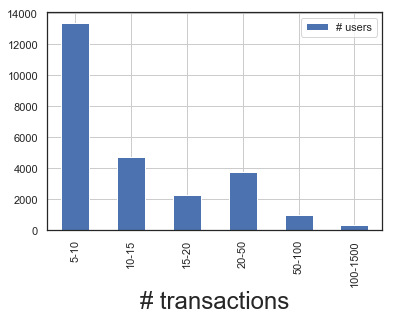

In [18]:
df = pd.DataFrame({'# transactions':labels, '# users': num_users})
ax = df.plot.bar(x='# transactions', y='# users', rot=90, grid = True)

# Periodicità nel dataset

In [19]:
bonifici.Timestamp = pd.to_datetime(bonifici.Timestamp)

In [20]:
bonifici_by_day = bonifici["Importo"].groupby(by=bonifici['Timestamp'].dt.date).count()

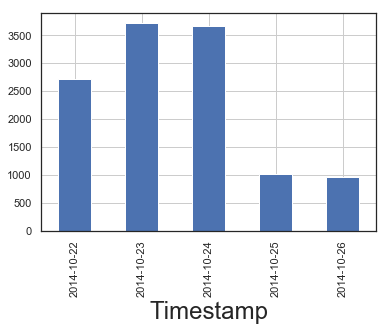

In [21]:
enddate = pd.to_datetime("2014-10-26").date()
bonifici_by_day[:enddate].plot.bar(x='# transactions', y='# users', rot=90, grid = True)

In [22]:
bonifici_by_day.info()

AttributeError: 'Series' object has no attribute 'info'

In [23]:
bonifici

IP                        IDSessione  \
0       000015aa866a770d7f0933644a60844d  999aa1bc674e5c86fb99176e80af9ddd   
1       000015aa866a770d7f0933644a60844d  a241741397153ff1e7103cbe6f847b4f   
2       000068115453899001dd92d51b4dbc10  50f78d9965a6cdf8d295921b01ab636d   
3       000068115453899001dd92d51b4dbc10  50f78d9965a6cdf8d295921b01ab636d   
4       000068115453899001dd92d51b4dbc10  50f78d9965a6cdf8d295921b01ab636d   
...                                  ...                               ...   
482904  ffff7a05ed7b09e075b0b890a65dda8d  f03f95fc47db7bfa123dc5b893d9c021   
482905  ffff7a05ed7b09e075b0b890a65dda8d  f2f2720477571db4fbd1d88771f44e0e   
482906  ffff7a05ed7b09e075b0b890a65dda8d  f2f2720477571db4fbd1d88771f44e0e   
482907  ffff7a05ed7b09e075b0b890a65dda8d  fdead8f54bece60581d37804f6cf020d   
482908  ffff7a05ed7b09e075b0b890a65dda8d  fe213371f243481cc02469b3e5c293d8   

                 Timestamp          TipoOperazione  Importo  \
0      2014-12-20 16:04:36  Bonifici Italia e SEPA  1525.00   
1      2014-12-31 15:37:02  Bonifici Italia e SEPA  4653.90   
2      2014-11-28 15:17:46  Bonifici Italia e SEPA   600.00   
3      2014-11-28 15:18:31  Bonifici Italia e SEPA   751.80   
4      2014-11-28 15:20:10  Bonifici Italia e SEPA  1255.00   
...                    ...                     ...      ...   
482904 2015-02-04 11:41:23  Bonifici Italia e SEPA   176.35   
482905 2015-02-05 11:53:54  Bonifici Italia e SEPA   118.34   
482906 2015-02-05 11:57:21  Bonifici Italia e SEPA   500.00   
482907 2015-01-21 09:58:13  Bonifici Italia e SEPA   279.90   
482908 2014-10-30 11:37:38  Bonifici Italia e SEPA   488.00   

                 DataValuta       DataEsecuzione MsgErrore  \
0       0000-00-00 00:00:00  0000-00-00 00:00:00       NaN   
1       2015-01-05 00:00:00  0000-00-00 00:00:00       NaN   
2       0000-00-00 00:00:00  0000-00-00 00:00:00       NaN   
3       0000-00-00 00:00:00  0000-00-00 00:00:00       NaN   
4       0000-00-00 00:00:00  0000-00-00 00:00:00       NaN   
...                     ...                  ...       ...   
482904  0000-00-00 00:00:00  0000-00-00 00:00:00       NaN   
482905  0000-00-00 00:00:00  0000-00-00 00:00:00       NaN   
482906  0000-00-00 00:00:00  0000-00-00 00:00:00       NaN   
482907  0000-00-00 00:00:00  0000-00-00 00:00:00       NaN   
482908  0000-00-00 00:00:00  0000-00-00 00:00:00       NaN   

                                  UserID                              IBAN  \
0       cd028892a4b9b49f84d787cc587022b4  50b83ea56f805b3b7fda91110e5d2ef9   
1       6dcbac66f4a535145a12b922341c06df  ace1b325d82cba3740f5ec9f5c60fa22   
2       01b79c6f4c9119ef0c95ce13b4367ee0  74c09acbad0cb4494f8a500e0ceab74b   
3       01b79c6f4c9119ef0c95ce13b4367ee0  c8dc49a7bcc846bba7fd6aa6ed9cfe13   
4       01b79c6f4c9119ef0c95ce13b4367ee0  3c639dad54cd18c869024628bc0f7473   
...                                  ...                               ...   
482904  565cc90a7c23e6937f06b826c9b7ba84  2cceefb2c1a3bd818bb519c8af75148a   
482905  565cc90a7c23e6937f06b826c9b7ba84  e418f2478e492550c21235c07a0000ae   
482906  565cc90a7c23e6937f06b826c9b7ba84  8cf253e126db890706e699a047600aeb   
482907  565cc90a7c23e6937f06b826c9b7ba84  333c76e4a86c1925087f5d2b9cee7f52   
482908  565cc90a7c23e6937f06b826c9b7ba84  38d27d75c617b41f28844d6161569ea3   

                              Nominativo NumConfermaSMS IBAN_CC      CC_ASN  
0       e383530b11779492b2ee4d224bc5e814             Si      IT   IT,AS3269  
1       f93032e887ec2d37eb0532b1342b130c             Si      IT   IT,AS3269  
2       e977a097962e3452636b16723042d13a             Si      IT  IT,AS31115  
3       ade83a612923f2882a4baa8efa76bdd1             Si      IT  IT,AS31115  
4       40e7f740a8c2541dd4bb2a6f7577464b             Si      IT  IT,AS31115  
...                                  ...            ...     ...         ...  
482904  60fc9531857ee0aeeed9b35bfe8157df             No      IT   IT,AS3269  
482905  4670172fdf6ba237714b9da29b0119

In [24]:
from numpy import array

In [25]:
array(bonifici)

array([['000015aa866a770d7f0933644a60844d',
        '999aa1bc674e5c86fb99176e80af9ddd',
        Timestamp('2014-12-20 16:04:36'), ..., 'Si', 'IT', 'IT,AS3269'],
       ['000015aa866a770d7f0933644a60844d',
        'a241741397153ff1e7103cbe6f847b4f',
        Timestamp('2014-12-31 15:37:02'), ..., 'Si', 'IT', 'IT,AS3269'],
       ['000068115453899001dd92d51b4dbc10',
        '50f78d9965a6cdf8d295921b01ab636d',
        Timestamp('2014-11-28 15:17:46'), ..., 'Si', 'IT', 'IT,AS31115'],
       ...,
       ['ffff7a05ed7b09e075b0b890a65dda8d',
        'f2f2720477571db4fbd1d88771f44e0e',
        Timestamp('2015-02-05 11:57:21'), ..., 'No', 'IT', 'IT,AS3269'],
       ['ffff7a05ed7b09e075b0b890a65dda8d',
        'fdead8f54bece60581d37804f6cf020d',
        Timestamp('2015-01-21 09:58:13'), ..., 'No', 'IT', 'IT,AS3269'],
       ['ffff7a05ed7b09e075b0b890a65dda8d',
        'fe213371f243481cc02469b3e5c293d8',
        Timestamp('2014-10-30 11:37:38'), ..., 'No', 'IT', 'IT,AS3269']],
      dtype=object)

In [26]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=400, verbose=0)
# demonstrate prediction
x_input = array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

ModuleNotFoundError: No module named 'keras'